In [17]:
### Assignment 1 Description
#### Step 1: Pick a data set from https://people.sc.fsu.edu/~jburkardt/data/csv/csv.html 
#and load it into a dataframe

In [22]:
#load libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.show()
plt.style.use('dark_background') #using JupyterLab dark theme (Settings/JupyterLab Theme)

In [40]:
#load data and create df
path="https://people.sc.fsu.edu/~jburkardt/data/csv/zillow.csv"
df = pd.read_csv(path, header=0)

#explore df
#print(df.head(2))
#print(df.tail(2))
#print(df.columns.values) #['Index' ' "Living Space (sq ft)"' ' "Beds"' ' "Baths"' ' "Zip"' ' "Year"' ' "List Price ($)"']

#rename columns
header=['index','living_space_sf','beds','baths','zip','year','list_price']
df.columns = header
print('New column values:',df.columns.values) #check col values

New column values: ['index' 'living_space_sf' 'beds' 'baths' 'zip' 'year' 'list_price']


In [ ]:
#### Step 2: Clean dataframe by replacing missing data
##### Print the count missing value in each column (# of True vs # of False)
##### Convert all non categorical data to type int or float

In [37]:
#get general df info
#print(df.describe())
print('df shape:', df.shape,'\n')

#count missing data, T = missing, F = not missing
missing_data = df.isnull()
print(missing_data.head(5),'\n')

#print amt of missing data in each column, where True = missing
print('Missing data by column:')
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

print('Conclusion: there is no missing data')

df shape: (20, 7) 

   index  living_space_sf   beds  baths    zip   year  list_price
0  False            False  False  False  False  False       False
1  False            False  False  False  False  False       False
2  False            False  False  False  False  False       False
3  False            False  False  False  False  False       False
4  False            False  False  False  False  False       False 

Missing data by column:
index
False    20
Name: index, dtype: int64

living_space_sf
False    20
Name: living_space_sf, dtype: int64

beds
False    20
Name: beds, dtype: int64

baths
False    20
Name: baths, dtype: int64

zip
False    20
Name: zip, dtype: int64

year
False    20
Name: year, dtype: int64

list_price
False    20
Name: list_price, dtype: int64

Conclusion: there is no missing data


In [95]:
#Convert all non categorical data to type int or float
#get data types
print('Current df data types:')
print(df.dtypes,'\n')
#df.head()

#confirm vars aren't categorical
print('Unique values by column:')
for i in df.columns.values.tolist():
    print(i)
    print(df[i].unique(),'\n')
    
#convert cols to ints and float data types
#df[["index"]] = df[["index"]].astype("int")

print('All non categorical column data types are correct') #could convert zip to categorical

Current df data types:
index                int64
living_space_sf      int64
beds                 int64
baths              float64
zip                  int64
year                 int64
list_price           int64
dtype: object 

Unique values by column:
index
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 

living_space_sf
[2222 1628 3824 1137 3560 2893 3631 2483 2400 1997 2097 3200 4892 1128
 1381 4242 2533 1158 2497 4010] 

beds
[3 5 6 4 2] 

baths
[3.5 2.  4.  3.  6.  1.  5. ] 

zip
[32312 32308 32309 32311 32303 32301 32310] 

year
[1981 2009 1954 1993 1973 1994 1996 2016 2002 2006 1964 2005 1955 2007
 1991 1990] 

list_price
[250000 185000 399000 150000 315000 699000 649000 613000 295000 290000
 465000 799900  89000 143000 569000 365000 155000 289000 549900] 

All non categorical column data types are correct


#### Step 3: Find the correlation of all columns that have type int or float

In [62]:
#get correlation matrix 
#all columns are type int or float so no need to select specific cols
#print(df[["baths","list_price"]].corr())
print(df[header].corr())

                    index  living_space_sf      beds     baths       zip  \
index            1.000000         0.071324 -0.049520 -0.009392 -0.468281   
living_space_sf  0.071324         1.000000  0.798973  0.815850  0.333485   
beds            -0.049520         0.798973  1.000000  0.720907  0.430314   
baths           -0.009392         0.815850  0.720907  1.000000  0.385997   
zip             -0.468281         0.333485  0.430314  0.385997  1.000000   
year             0.161067        -0.030235 -0.115121  0.062906 -0.018947   
list_price       0.043812         0.820899  0.588464  0.696853  0.444229   

                     year  list_price  
index            0.161067    0.043812  
living_space_sf -0.030235    0.820899  
beds            -0.115121    0.588464  
baths            0.062906    0.696853  
zip             -0.018947    0.444229  
year             1.000000    0.200663  
list_price       0.200663    1.000000  


#### Step 4: Use Seaborn to plot one variable and the output to vizualize the correlation
##### Do this for 3 different variables
##### Hint: Use variables that are highly correlated to the output column.

Compared: Living space sf, baths, and beds 



Text(0.5, 1.0, 'Living Space S.F. vs List Price')

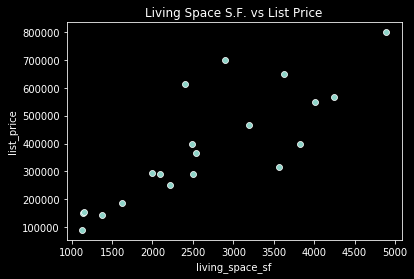

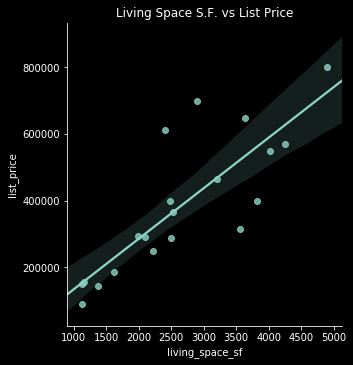

In [88]:
#plots
print('Compared: Living space sf, baths, and beds','\n')

#living space square feet
p1 = sns.scatterplot(x="living_space_sf", y="list_price", data=df)
plt.title('Living Space S.F. vs List Price')
p2 = sns.lmplot(x="living_space_sf", y="list_price", data=df)
plt.title('Living Space S.F. vs List Price')

Text(0.5, 1.0, 'Number of Bathrooms. vs List Price')

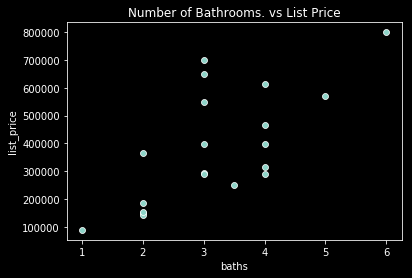

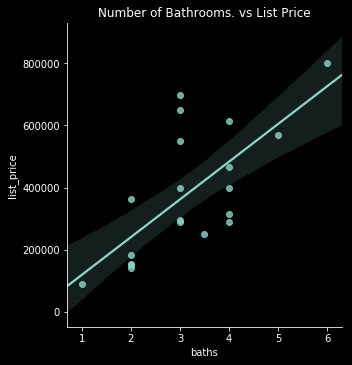

In [92]:
#number of bathrooms
p1 = sns.scatterplot(x="baths", y="list_price", data=df)
plt.title('Number of Bathrooms. vs List Price')
p2 = sns.lmplot(x="baths", y="list_price", data=df)
plt.title('Number of Bathrooms. vs List Price')

Text(0.5, 1.0, 'Number of beds vs List Price')

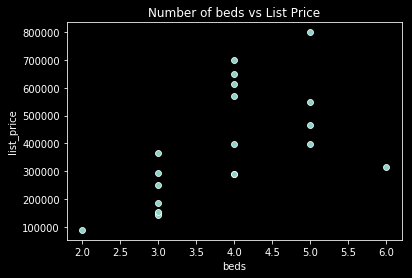

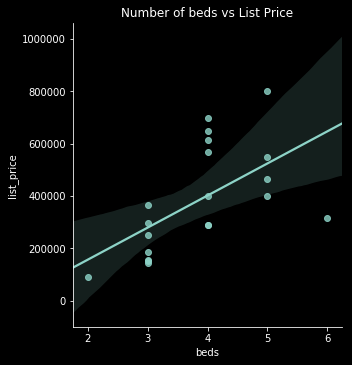

In [94]:
#number of bedrooms
p1 = sns.scatterplot(x="beds", y="list_price", data=df)
plt.title('Number of beds vs List Price')
sns.lmplot(x="beds", y="list_price", data=df)
plt.title('Number of beds vs List Price')

#### Step 5: Pick a column with categorical data and create a box plot representing the unique values
##### Print all the unique values in the column
##### Create the box plot

In [104]:
#import another data set 
path="https://people.sc.fsu.edu/~jburkardt/data/csv/mlb_players.csv"
#df2 = pd.read_csv(path, header=0,skipinitialspace=True,quotechar='"',sep=",")
df2 = pd.read_csv(path, header=0,skipinitialspace=True,quotechar='"',sep=",",nrows=300) #there is an error at the end of the file

#explore data
print('df head:','\n',df2.head(),'\n')
print('Column values:',df2.columns.values,'\n')
print('Column Types:','\n',df2.dtypes,'\n')

#print unique values
print('Teams:',df2.Team.unique())

df head: 
               Name Team       Position  Height(inches)  Weight(lbs)    Age
0    Adam Donachie  BAL        Catcher              74          180  22.99
1        Paul Bako  BAL        Catcher              74          215  34.69
2  Ramon Hernandez  BAL        Catcher              72          210  30.78
3     Kevin Millar  BAL  First Baseman              72          210  35.43
4      Chris Gomez  BAL  First Baseman              73          188  35.71 

Column values: ['Name' 'Team' 'Position' 'Height(inches)' 'Weight(lbs)' 'Age'] 

Column Types: 
 Name               object
Team               object
Position           object
Height(inches)      int64
Weight(lbs)         int64
Age               float64
dtype: object 

Teams: ['BAL' 'CWS' 'ANA' 'BOS' 'CLE' 'OAK' 'NYY' 'DET' 'SEA']


Text(0.5, 1.0, 'MLB Teams and Player Age')

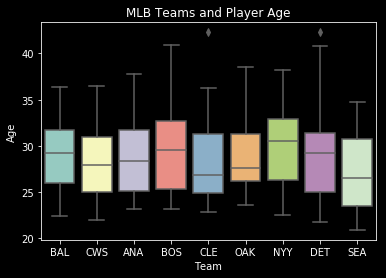

In [106]:
#create box plot
sns.boxplot(x="Team",y="Age",data=df2)
plt.title('MLB Teams and Player Age')